In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [59]:
!pip install wget


  Stored in directory: /home/dsxuser/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [76]:
import wget

url = "https://data.sfgov.org/resource/pyih-qa8i.csv"
wget.download(url)
sf_df = pd.read_csv('pyih-qa8i.csv')

'pyih-qa8i.csv'

In [130]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0ce75edca2a44bca800baccbed519dbf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZVaAl9rn-3eBqZhsc66YYS9v1-gxq4Pf3',
    ibm_auth_endpoint="https://iam.eu-gb.bemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objestorage.serice.networkyer.com')

body = client_0ce75edca2a44bca800baccbed519dbf.get_object(Bucket='capstoneprojectfinalproject-donotdelete-pr-ucdvsey5kevcls',Key='Restaurant_Scores_-_LIVES_Standard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()

business_id            business_name  business_address  business_city  \
0        69618  Fancy Wheatfield Bakery  1362 Stockton St  San Francisco   
1        97975               BREADBELLY   1408 Clement St  San Francisco   
2        69487   Hakkasan San Francisco       1 Kearny St  San Francisco   
3        91044    Chopsticks Restaurant   4615 Mission St  San Francisco   
4        85987                  Tselogs      552 Jones St  San Francisco   

  business_state business_postal_code  business_latitude  business_longitude  \
0             CA                94133                NaN                 NaN   
1             CA                94118                NaN                 NaN   
2             CA                94108                NaN                 NaN   
3             CA                94112                NaN                 NaN   
4             CA                94102                NaN                 NaN   

  business_location  business_phone_number  ...            inspection_type  \
0               NaN                    NaN  ...                  Complaint   
1               NaN           1.415724e+10  ...      Routine - Unscheduled   
2               NaN                    NaN  ...      Routine - Unscheduled   
3               NaN                    NaN  ...  Non-inspection site visit   
4               NaN                    NaN  ...      Routine - Unscheduled   

            violation_id                              violation_description  \
0  69618_20190304_103130           Inadequate sewage or wastewater disposal   
1  97975_20190725_103124  Inadequately cleaned or sanitized food contact...   
2  69487_20180418_103119  Inadequate and inaccessible handwashing facili...   
3                    NaN                                                NaN   
4  85987_20180412_103132                           Improper thawing methods   

   risk_category Neighborhoods (old) Police Districts Supervisor Districts  \
0  Moderate Risk                 NaN              NaN                  NaN   
1  Moderate Risk                 NaN              NaN                  NaN   
2  Moderate Risk                 NaN              NaN                  NaN   
3            NaN                 NaN              NaN                  NaN   
4  Moderate Risk                 NaN              NaN                  NaN   

   Fire Prevention Districts  Zip Codes  Analysis Neighborhoods  
0                        NaN        NaN                     NaN  
1                        NaN        NaN                     NaN  
2                        NaN        NaN                     NaN  
3                        NaN        NaN                     NaN  
4                        NaN        NaN                     NaN  

[5 rows x 23 columns]

In [140]:
df_data_0.shape

(5215, 23)

In [141]:
copy_sf_df = df_data_0
copy_sf_df.head()

business_id                business_name business_address  business_city  \
33          5827  HILLCREST ELEMENTARY SCHOOL   810 SILVER Ave  San Francisco   
204         2409     Mission Hunan Restaurant     2960 16th St  San Francisco   
355        59002    Yummy Bakery & Restaurant   607 Jackson St  San Francisco   
363        10332         Harvest Urban Market      191 08th St  San Francisco   
427         5257                LITTLE BAOBAB     3388 19th St  San Francisco   

    business_state business_postal_code  business_latitude  \
33              CA                94134          37.729016   
204             CA                94103          37.765142   
355             CA                94133          37.796152   
363             CA                94103          37.776384   
427             CA                94110          37.760295   

     business_longitude              business_location  business_phone_number  \
33          -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
204         -122.419026  POINT (-122.419026 37.765142)           1.415563e+10   
355         -122.405255  POINT (-122.405255 37.796152)           1.415599e+10   
363         -122.411684  POINT (-122.411684 37.776384)           1.415562e+10   
427         -122.418953  POINT (-122.418953 37.760295)           1.415578e+10   

     ...        inspection_type           violation_id  \
33   ...  Routine - Unscheduled   5827_20190903_103120   
204  ...  Routine - Unscheduled   2409_20190724_103103   
355  ...  Routine - Unscheduled  59002_20190709_103161   
363  ...  Routine - Unscheduled  10332_20181127_103153   
427  ...  Routine - Unscheduled   5257_20190911_103129   

                                 violation_description  risk_category  \
33              Moderate risk food holding temperature  Moderate Risk   
204                 High risk food holding temperature      High Risk   
355                        Low risk vermin infestation       Low Risk   
363  Inadequate dressing rooms or improper storage ...       Low Risk   
427            Insufficient hot water or running water  Moderate Risk   

    Neighborhoods (old) Police Districts Supervisor Districts  \
33                  5.0              3.0                  7.0   
204                19.0              4.0                  7.0   
355                 4.0              1.0                 10.0   
363                34.0              2.0                  9.0   
427                19.0              4.0                  7.0   

     Fire Prevention Districts  Zip Codes  Analysis Neighborhoods  
33                         9.0      309.0                     7.0  
204                        8.0    28853.0                    20.0  
355                        3.0    28857.0                     6.0  
363                        8.0    28853.0                    34.0  
427                        2.0    28859.0                    20.0  

[5 rows x 23 columns]

In [142]:
copy_sf_df.dropna(subset=['business_id','business_name',
                          'business_address','business_city','business_state',
                          'business_postal_code','business_latitude','business_longitude',
                          'business_location','business_phone_number','inspection_id',
                          'inspection_id','inspection_date','inspection_score','inspection_type',
                          'violation_id','violation_description'],inplace=True)

In [146]:
df_risk_score = copy_sf_df.groupby('risk_category', axis=0)['inspection_score'].mean()
df_risk_score.head()

risk_category
High Risk        81.008163
Low Risk         87.345154
Moderate Risk    85.187436
Name: inspection_score, dtype: float64

In [147]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


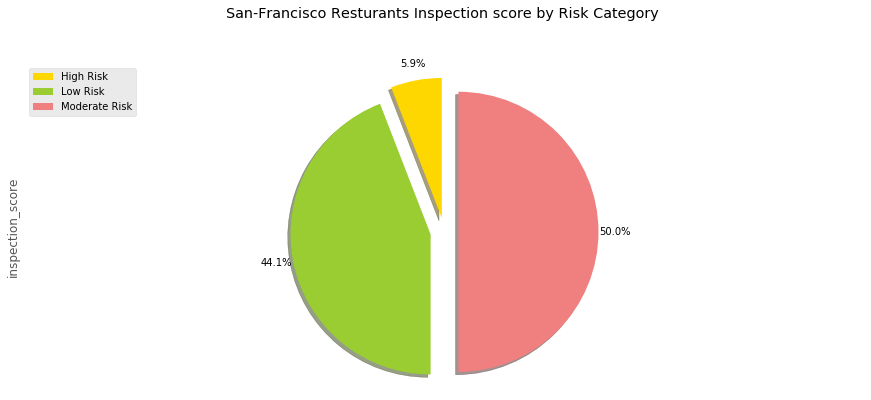

In [148]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_risk['inspection_score'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('San-Francisco Resturants Inspection score by Risk Category', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_risk.index, loc='upper left') 

plt.show()

In [149]:
def getMonth(s):
    return s.split("/")[0]

def getDay(s):
    return s.split("/")[1]

def getYear(s):
     ss= s.split("/")[2]
     return ss[:4]

def getYearMonth(s):
    return s.split("/")[1]+"/"+s.split("/")[2]

In [151]:
copy_sf_df['year']= copy_sf_df['inspection_date'].apply(lambda x: getYear(str(x)))
copy_sf_df['Month']= copy_sf_df['inspection_date'].apply(lambda x: getMonth(str(x)))
copy_sf_df['day']= copy_sf_df['inspection_date'].apply(lambda x: getDay(str(x)))
copy_sf_df.head()


business_id                business_name business_address  business_city  \
33          5827  HILLCREST ELEMENTARY SCHOOL   810 SILVER Ave  San Francisco   
204         2409     Mission Hunan Restaurant     2960 16th St  San Francisco   
355        59002    Yummy Bakery & Restaurant   607 Jackson St  San Francisco   
363        10332         Harvest Urban Market      191 08th St  San Francisco   
427         5257                LITTLE BAOBAB     3388 19th St  San Francisco   

    business_state business_postal_code  business_latitude  \
33              CA                94134          37.729016   
204             CA                94103          37.765142   
355             CA                94133          37.796152   
363             CA                94103          37.776384   
427             CA                94110          37.760295   

     business_longitude              business_location  business_phone_number  \
33          -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
204         -122.419026  POINT (-122.419026 37.765142)           1.415563e+10   
355         -122.405255  POINT (-122.405255 37.796152)           1.415599e+10   
363         -122.411684  POINT (-122.411684 37.776384)           1.415562e+10   
427         -122.418953  POINT (-122.418953 37.760295)           1.415578e+10   

     ...  risk_category Neighborhoods (old)  Police Districts  \
33   ...  Moderate Risk                 5.0               3.0   
204  ...      High Risk                19.0               4.0   
355  ...       Low Risk                 4.0               1.0   
363  ...       Low Risk                34.0               2.0   
427  ...  Moderate Risk                19.0               4.0   

    Supervisor Districts Fire Prevention Districts Zip Codes  \
33                   7.0                       9.0     309.0   
204                  7.0                       8.0   28853.0   
355                 10.0                       3.0   28857.0   
363                  9.0                       8.0   28853.0   
427                  7.0                       2.0   28859.0   

    Analysis Neighborhoods  year  Month  day  
33                     7.0  2019     09   03  
204                   20.0  2019     07   24  
355                    6.0  2019     07   09  
363                   34.0  2018     11   27  
427                   20.0  2019     09   11  

[5 rows x 26 columns]

In [154]:
sf_df_year = copy_sf_df.groupby(['risk_category','year'])['inspection_score'].count()
sf_df_year.head(25)

risk_category  year
High Risk      2016     41
               2017    248
               2018    226
               2019    220
Low Risk       2016    201
               2017    851
               2018    789
               2019    697
Moderate Risk  2016    160
               2017    606
               2018    634
               2019    542
Name: inspection_score, dtype: int64

In [155]:
un_SF_df = sf_df_year.unstack()

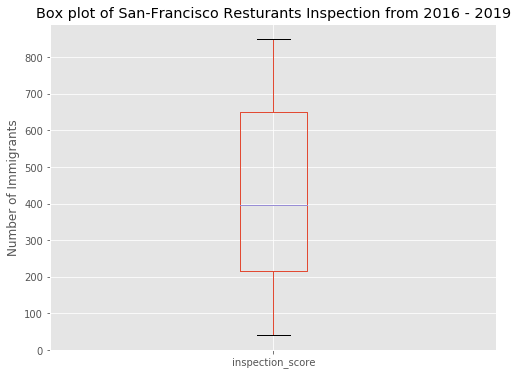

In [159]:
sf_df_year.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of San-Francisco Resturants Inspection from 2016 - 2019')
plt.ylabel('Number of Immigrants')

plt.show()

In [160]:
years = list(map(str, range(2016, 2019)))

sf_df_year.index

MultiIndex(levels=[['High Risk', 'Low Risk', 'Moderate Risk'], ['2016', '2017', '2018', '2019']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['risk_category', 'year'])

In [161]:
df_gptest = copy_sf_df[['risk_category','year','inspection_score']]
df_risk_year = df_gptest.groupby(['risk_category','year'],as_index= False).count()
df_risk_year

risk_category  year  inspection_score
0       High Risk  2016                41
1       High Risk  2017               248
2       High Risk  2018               226
3       High Risk  2019               220
4        Low Risk  2016               201
5        Low Risk  2017               851
6        Low Risk  2018               789
7        Low Risk  2019               697
8   Moderate Risk  2016               160
9   Moderate Risk  2017               606
10  Moderate Risk  2018               634
11  Moderate Risk  2019               542

In [162]:
all(isinstance(column, str) for column in df_risk_year.columns)

True

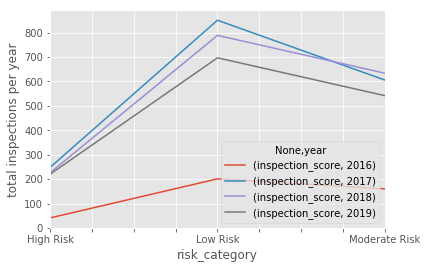

In [164]:
grouped_pivot = df_risk_year.pivot(index='risk_category',columns='year').plot()
#grouped_pivot
plt.ylabel('total inspections per year');

In [165]:
import seaborn as sns
import re

In [166]:
new_SF_df = copy_sf_df
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\d+', '')
new_SF_df.head()

business_id                business_name business_address  business_city  \
33          5827  HILLCREST ELEMENTARY SCHOOL       SILVER Ave  San Francisco   
204         2409     Mission Hunan Restaurant            th St  San Francisco   
355        59002    Yummy Bakery & Restaurant       Jackson St  San Francisco   
363        10332         Harvest Urban Market            th St  San Francisco   
427         5257                LITTLE BAOBAB            th St  San Francisco   

    business_state business_postal_code  business_latitude  \
33              CA                94134          37.729016   
204             CA                94103          37.765142   
355             CA                94133          37.796152   
363             CA                94103          37.776384   
427             CA                94110          37.760295   

     business_longitude              business_location  business_phone_number  \
33          -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
204         -122.419026  POINT (-122.419026 37.765142)           1.415563e+10   
355         -122.405255  POINT (-122.405255 37.796152)           1.415599e+10   
363         -122.411684  POINT (-122.411684 37.776384)           1.415562e+10   
427         -122.418953  POINT (-122.418953 37.760295)           1.415578e+10   

     ...  risk_category Neighborhoods (old)  Police Districts  \
33   ...  Moderate Risk                 5.0               3.0   
204  ...      High Risk                19.0               4.0   
355  ...       Low Risk                 4.0               1.0   
363  ...       Low Risk                34.0               2.0   
427  ...  Moderate Risk                19.0               4.0   

    Supervisor Districts Fire Prevention Districts Zip Codes  \
33                   7.0                       9.0     309.0   
204                  7.0                       8.0   28853.0   
355                 10.0                       3.0   28857.0   
363                  9.0                       8.0   28853.0   
427                  7.0                       2.0   28859.0   

    Analysis Neighborhoods  year  Month  day  
33                     7.0  2019     09   03  
204                   20.0  2019     07   24  
355                    6.0  2019     07   09  
363                   34.0  2018     11   27  
427                   20.0  2019     09   11  

[5 rows x 26 columns]

In [167]:
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\sSt', '')
new_SF_df.head()

business_id                business_name business_address  business_city  \
33          5827  HILLCREST ELEMENTARY SCHOOL       SILVER Ave  San Francisco   
204         2409     Mission Hunan Restaurant               th  San Francisco   
355        59002    Yummy Bakery & Restaurant          Jackson  San Francisco   
363        10332         Harvest Urban Market               th  San Francisco   
427         5257                LITTLE BAOBAB               th  San Francisco   

    business_state business_postal_code  business_latitude  \
33              CA                94134          37.729016   
204             CA                94103          37.765142   
355             CA                94133          37.796152   
363             CA                94103          37.776384   
427             CA                94110          37.760295   

     business_longitude              business_location  business_phone_number  \
33          -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
204         -122.419026  POINT (-122.419026 37.765142)           1.415563e+10   
355         -122.405255  POINT (-122.405255 37.796152)           1.415599e+10   
363         -122.411684  POINT (-122.411684 37.776384)           1.415562e+10   
427         -122.418953  POINT (-122.418953 37.760295)           1.415578e+10   

     ...  risk_category Neighborhoods (old)  Police Districts  \
33   ...  Moderate Risk                 5.0               3.0   
204  ...      High Risk                19.0               4.0   
355  ...       Low Risk                 4.0               1.0   
363  ...       Low Risk                34.0               2.0   
427  ...  Moderate Risk                19.0               4.0   

    Supervisor Districts Fire Prevention Districts Zip Codes  \
33                   7.0                       9.0     309.0   
204                  7.0                       8.0   28853.0   
355                 10.0                       3.0   28857.0   
363                  9.0                       8.0   28853.0   
427                  7.0                       2.0   28859.0   

    Analysis Neighborhoods  year  Month  day  
33                     7.0  2019     09   03  
204                   20.0  2019     07   24  
355                    6.0  2019     07   09  
363                   34.0  2018     11   27  
427                   20.0  2019     09   11  

[5 rows x 26 columns]

In [168]:
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\sSt', '')
new_SF_df.head()

business_id                business_name business_address  business_city  \
33          5827  HILLCREST ELEMENTARY SCHOOL       SILVER Ave  San Francisco   
204         2409     Mission Hunan Restaurant               th  San Francisco   
355        59002    Yummy Bakery & Restaurant          Jackson  San Francisco   
363        10332         Harvest Urban Market               th  San Francisco   
427         5257                LITTLE BAOBAB               th  San Francisco   

    business_state business_postal_code  business_latitude  \
33              CA                94134          37.729016   
204             CA                94103          37.765142   
355             CA                94133          37.796152   
363             CA                94103          37.776384   
427             CA                94110          37.760295   

     business_longitude              business_location  business_phone_number  \
33          -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
204         -122.419026  POINT (-122.419026 37.765142)           1.415563e+10   
355         -122.405255  POINT (-122.405255 37.796152)           1.415599e+10   
363         -122.411684  POINT (-122.411684 37.776384)           1.415562e+10   
427         -122.418953  POINT (-122.418953 37.760295)           1.415578e+10   

     ...  risk_category Neighborhoods (old)  Police Districts  \
33   ...  Moderate Risk                 5.0               3.0   
204  ...      High Risk                19.0               4.0   
355  ...       Low Risk                 4.0               1.0   
363  ...       Low Risk                34.0               2.0   
427  ...  Moderate Risk                19.0               4.0   

    Supervisor Districts Fire Prevention Districts Zip Codes  \
33                   7.0                       9.0     309.0   
204                  7.0                       8.0   28853.0   
355                 10.0                       3.0   28857.0   
363                  9.0                       8.0   28853.0   
427                  7.0                       2.0   28859.0   

    Analysis Neighborhoods  year  Month  day  
33                     7.0  2019     09   03  
204                   20.0  2019     07   24  
355                    6.0  2019     07   09  
363                   34.0  2018     11   27  
427                   20.0  2019     09   11  

[5 rows x 26 columns]

In [169]:
new_SF_df.Month = new_SF_df.Month.astype(np.int64)
new_SF_df.day = new_SF_df.day.astype(np.int64)

In [170]:
ins_count = new_SF_df.groupby('business_postal_code').count()
ins_count

business_id  business_name  business_address  \
business_postal_code                                                 
92672                           8              8                 8   
941                             7              7                 7   
94102                         185            185               185   
94103                         578            578               578   
94104                          66             66                66   
94105                          18             18                18   
94107                         173            173               173   
94108                          90             90                90   
94109                         233            233               233   
94110                        1060           1060              1060   
941102019                       7              7                 7   
94111                          83             83                83   
94112                         406            406               406   
94114                         226            226               226   
94115                         307            307               307   
94116                          15             15                15   
94117                         207            207               207   
94118                         178            178               178   
94121                         158            158               158   
94122                         134            134               134   
94123                         232            232               232   
94124                         121            121               121   
94127                         117            117               117   
94131                         155            155               155   
94132                         222            222               222   
94133                          86             86                86   
94134                         139            139               139   
94158                           4              4                 4   

                      business_city  business_state  business_latitude  \
business_postal_code                                                     
92672                             8               8                  8   
941                               7               7                  7   
94102                           185             185                185   
94103                           578             578                578   
94104                            66              66                 66   
94105                            18              18                 18   
94107                           173             173                173   
94108                            90              90                 90   
94109                           233             233                233   
94110                          1060            1060               1060   
941102019                         7               7                  7   
94111                            83              83                 83   
94112                           406             406                406   
94114                           226             226                226   
94115                           307             307                307   
94116                            15              15                 15   
94117                           207             207                207   
94118                           178             178                178   
94121                           158             158                158   
94122                           134             134                134   
94123                           232             232                232   
94124                           121             121                121   
94127                           117             117                117   
94131                           155             155                155 

In [171]:
df_all_year = un_SF_df.T
df_all_year

risk_category  High Risk  Low Risk  Moderate Risk
year                                             
2016                  41       201            160
2017                 248       851            606
2018                 226       789            634
2019                 220       697            542

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

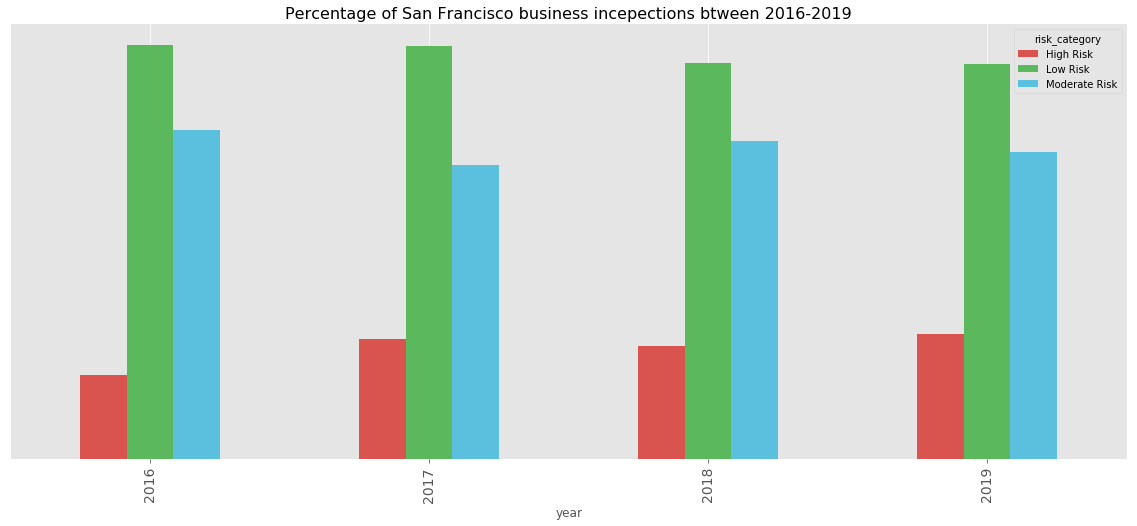

In [187]:
ax = df_all_year.div(df_all_year.sum(1), axis=0).plot(kind='bar', color=['#d9534f','#5cb85c', '#5bc0de' ], figsize=(20, 8))

ax.set_title("Percentage of San Francisco business incepections btween 2016-2019",fontsize=16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
ax.set_xlabel(df_all_year)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

In [188]:
sf_count= new_SF_df['business_postal_code'].value_counts().to_frame()
sf_count .rename(columns={'business_postal_code': 'Count'}, inplace=True)
sf_count.index.name ='business_postal_code'
sf_count.reset_index(level=0, inplace=True)
sf_count

business_postal_code  Count
0                 94110   1060
1                 94103    578
2                 94112    406
3                 94115    307
4                 94109    233
5                 94123    232
6                 94114    226
7                 94132    222
8                 94117    207
9                 94102    185
10                94118    178
11                94107    173
12                94121    158
13                94131    155
14                94134    139
15                94122    134
16                94124    121
17                94127    117
18                94108     90
19                94133     86
20                94111     83
21                94104     66
22                94105     18
23                94116     15
24                92672      8
25                  941      7
26            941102019      7
27                94158      4

In [189]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m       conda-forge
    wordcloud:       1.4.1-py36_0      conda-forge

The following packages will be UPDATE

In [191]:
stopwords = set(STOPWORDS)

In [192]:
lst_v_dsc = new_SF_df['violation_description'].tolist()

word_string = " ".join(str(s) for s in lst_v_dsc)

wordcloud = WordCloud(background_color='white', max_words=2000,stopwords=stopwords).generate(word_string)

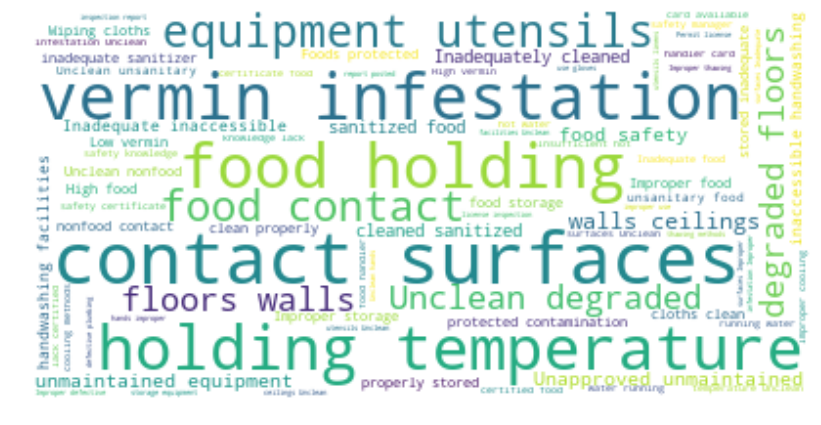

In [193]:
stopwords.add('Moderate risk') # add the words said to stopwords
stopwords.add('risk')
stopwords.add('Moderate')
# re-generate the word cloud
wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### **Let's find out how many entries there are in our new dataframe.**

In [198]:
new_SF_df.shape

(5215, 26)

So the dataframe consists of 5215 inspections, which took place in period 2016-2019. In order to reduce computational cost, let's just work with the first 100 inspections in this dataset.

In [200]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
new_SF_df_limt = new_SF_df.iloc[0:limit, :]
new_SF_df_limt.shape

(100, 26)

In [263]:
# instantiate a feature group for the incidents in the dataframe
inspection = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(new_SF_df_limt.business_latitude, new_SF_df_limt.business_longitude):
    inspection.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(new_SF_df_limt.business_latitude)
longitudes = list(new_SF_df_limt.business_longitude)
labels = list(new_SF_df_limt.risk_category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sf_map)    
    
# add incidents to map
sf_map.add_child(inspection)

In [264]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
inspection = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(new_SF_df.business_latitude, new_SF_df.business_longitude, new_SF_df.risk_category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(inspection)

# display map
sanfran_map

### **Modeling**

In this part of our project we will apply a machine learning technique to cluster and classifying the inspection in order to have a better understanding of inspection process.

Features extraction
Before start the modeling stage We need to:

convert inspection_date field to date time object

drop unnecessary fields from the dataset

In [201]:
new_SF_df['inspection_date'] = pd.to_datetime(new_SF_df['inspection_date'])

m_SF_df = new_SF_df.drop(columns=['business_location', 'business_phone_number', 'business_city' ,'business_state'])
m_SF_df.head()

business_id                business_name business_address  \
33          5827  HILLCREST ELEMENTARY SCHOOL       SILVER Ave   
204         2409     Mission Hunan Restaurant               th   
355        59002    Yummy Bakery & Restaurant          Jackson   
363        10332         Harvest Urban Market               th   
427         5257                LITTLE BAOBAB               th   

    business_postal_code  business_latitude  business_longitude  \
33                 94134          37.729016         -122.419253   
204                94103          37.765142         -122.419026   
355                94133          37.796152         -122.405255   
363                94103          37.776384         -122.411684   
427                94110          37.760295         -122.418953   

      inspection_id inspection_date  inspection_score        inspection_type  \
33    5827_20190903      2019-09-03              88.0  Routine - Unscheduled   
204   2409_20190724      2019-07-24              87.0  Routine - Unscheduled   
355  59002_20190709      2019-07-09              94.0  Routine - Unscheduled   
363  10332_20181127      2018-11-27              75.0  Routine - Unscheduled   
427   5257_20190911      2019-09-11              82.0  Routine - Unscheduled   

     ...  risk_category Neighborhoods (old) Police Districts  \
33   ...  Moderate Risk                 5.0              3.0   
204  ...      High Risk                19.0              4.0   
355  ...       Low Risk                 4.0              1.0   
363  ...       Low Risk                34.0              2.0   
427  ...  Moderate Risk                19.0              4.0   

     Supervisor Districts  Fire Prevention Districts  Zip Codes  \
33                    7.0                        9.0      309.0   
204                   7.0                        8.0    28853.0   
355                  10.0                        3.0    28857.0   
363                   9.0                        8.0    28853.0   
427                   7.0                        2.0    28859.0   

     Analysis Neighborhoods  year  Month day  
33                      7.0  2019      9   3  
204                    20.0  2019      7  24  
355                     6.0  2019      7   9  
363                    34.0  2018     11  27  
427                    20.0  2019      9  11  

[5 rows x 22 columns]

Let’s see how many of each class is in our data set

In [202]:
m_SF_df['risk_category'].value_counts()

Low Risk         2538
Moderate Risk    1942
High Risk         735
Name: risk_category, dtype: int64

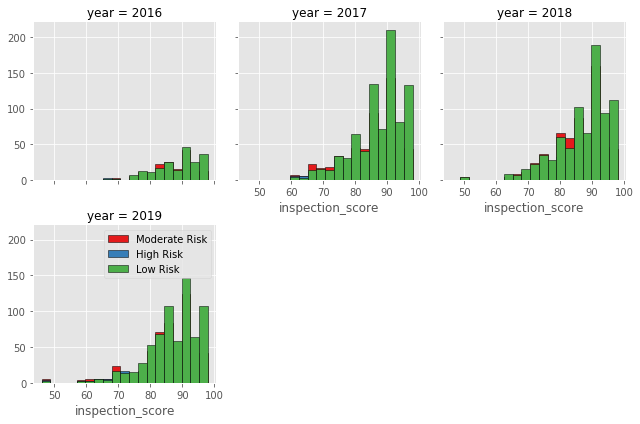

In [203]:

bins = np.linspace(m_SF_df.inspection_score.min(), m_SF_df.inspection_score.max(), 20)
g = sns.FacetGrid(m_SF_df, col="year", hue="risk_category", palette="Set1", col_wrap=3)
g.map(plt.hist, 'inspection_score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Lets look at the day of the week businesses were getting inspected

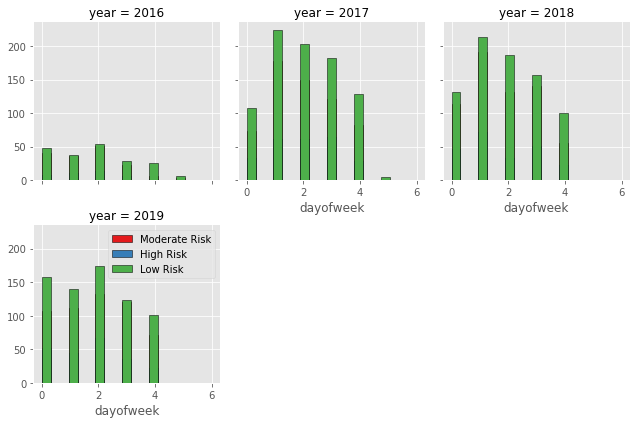

In [204]:

m_SF_df['dayofweek'] = m_SF_df['inspection_date'].dt.dayofweek
bins = np.linspace(m_SF_df.dayofweek.min(), m_SF_df.dayofweek.max(), 20)
g = sns.FacetGrid(m_SF_df, col="year", hue="risk_category", palette="Set1", col_wrap=3)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that businesses that get inspected at the end of the week so lets use Feature binarization to set a threshold values less then day 4

In [216]:
m_SF_df['weekend'] = m_SF_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
m_SF_df.head()

business_id                business_name business_address  \
33          5827  HILLCREST ELEMENTARY SCHOOL       SILVER Ave   
204         2409     Mission Hunan Restaurant               th   
355        59002    Yummy Bakery & Restaurant          Jackson   
363        10332         Harvest Urban Market               th   
427         5257                LITTLE BAOBAB               th   

    business_postal_code  business_latitude  business_longitude  \
33                 94134          37.729016         -122.419253   
204                94103          37.765142         -122.419026   
355                94133          37.796152         -122.405255   
363                94103          37.776384         -122.411684   
427                94110          37.760295         -122.418953   

      inspection_id inspection_date  inspection_score        inspection_type  \
33    5827_20190903      2019-09-03              88.0  Routine - Unscheduled   
204   2409_20190724      2019-07-24              87.0  Routine - Unscheduled   
355  59002_20190709      2019-07-09              94.0  Routine - Unscheduled   
363  10332_20181127      2018-11-27              75.0  Routine - Unscheduled   
427   5257_20190911      2019-09-11              82.0  Routine - Unscheduled   

     ... risk_category Neighborhoods (old)  Police Districts  \
33   ...             2                 5.0               3.0   
204  ...             3                19.0               4.0   
355  ...             1                 4.0               1.0   
363  ...             1                34.0               2.0   
427  ...             2                19.0               4.0   

     Supervisor Districts  Fire Prevention Districts  Zip Codes  \
33                    7.0                        9.0      309.0   
204                   7.0                        8.0    28853.0   
355                  10.0                        3.0    28857.0   
363                   9.0                        8.0    28853.0   
427                   7.0                        2.0    28859.0   

     Analysis Neighborhoods  year  dayofweek weekend  
33                      7.0  2019          1       0  
204                    20.0  2019          2       0  
355                     6.0  2019          1       0  
363                    34.0  2018          1       0  
427                    20.0  2019          2       0  

[5 rows x 22 columns]

### **Convert Categorical features to numerical values**

In [217]:
m_SF_df.groupby(['year'])['risk_category'].value_counts(normalize=True)

year  risk_category
2016  1                0.500000
      2                0.398010
      3                0.101990
2017  1                0.499120
      2                0.355425
      3                0.145455
2018  1                0.478472
      2                0.384475
      3                0.137053
2019  1                0.477724
      2                0.371487
      3                0.150788
Name: risk_category, dtype: float64

In [219]:

Feature = m_SF_df[['business_postal_code','business_latitude',
             'business_longitude','inspection_score',
              'year', 'dayofweek']]
my_features = Feature[Feature.business_postal_code.apply(lambda x: x.isnumeric())]
X = my_features
X[0:5]

business_postal_code  business_latitude  business_longitude  \
33                 94134          37.729016         -122.419253   
204                94103          37.765142         -122.419026   
355                94133          37.796152         -122.405255   
363                94103          37.776384         -122.411684   
427                94110          37.760295         -122.418953   

     inspection_score  year  dayofweek  
33               88.0  2019          1  
204              87.0  2019          2  
355              94.0  2019          1  
363              75.0  2018          1  
427              82.0  2019          2

To build a machine learning classifier we need a label set Y as follows:

In [220]:

my_class_df = m_SF_df[m_SF_df.business_postal_code.apply(lambda x: x.isnumeric())]
y = my_class_df['risk_category'].values
y[0:5]

array([2, 3, 1, 1, 2])

### **Classification**

Now, it is time to use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

    * K Nearest Neighbor(KNN)
    * Logistic Regression

#### **K Nearest Neighbor(KNN)**

We should find the best k to build the model with the best accuracy.

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4172, 6) (4172,)
Test set: (1043, 6) (1043,)


In [224]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.47555129434324067 with k= 2


In [225]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhatKNN = neigh.predict(X_test)
print("Train set Accuracy--> ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy -->", metrics.accuracy_score(y_test, yhatKNN))
print("F1  Accuracy -->", metrics.f1_score(y_test, yhatKNN, average='weighted'))

Train set Accuracy-->  0.599712368168744
Test set Accuracy --> 0.4477468839884947
F1  Accuracy --> 0.4138331877658865


#### **Logistic Regression**

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [227]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [228]:
print("Train set Accuracy--> ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy -->", metrics.accuracy_score(y_test, yhatLR))

Train set Accuracy-->  0.49232981783317353
Test set Accuracy --> 0.46404602109300097


In [229]:
log_loss(y_test, yhat_prob)

0.9951582991190653

In [230]:
jaccard_similarity_score(y_test, yhatKNN)

0.4477468839884947

In [231]:
jaccard_similarity_score(y_test, yhatLR)

0.46404602109300097

In [232]:
#f1LR = f1_score(y, yhatLR, average='weighted')
print("Regression F1  Accuracy -->", metrics.f1_score(y_test, yhatLR, average='weighted'))

Regression F1  Accuracy --> 0.2941693178899967


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## **Using Fourquare to visualize businesses venues**

We will make calls to the Foursquare API for different purposes. You will construct a URL to send a request to the API to search for a specific type of venues, to explore a particular business venue, to explore a Foursquare user, to explore a geographical location, and to get trending venues around a location. Also, you will learn how to use the visualization library, Folium, to visualize the results.

**Import necessary Libraries**

first we import some libraries that we need to complete our object effeciently

In [234]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [235]:
CLIENT_ID = 'EGJ4JLYHQDQDV05Y3AJB1CDSUBGWT1XURNJAWKVGFZYIZZRR' # your Foursquare ID
CLIENT_SECRET = '2BKSLK4VVRZGHP2HQ5TXQICQP13YK0E5ES3A3SZ3UGYPBAWY' # your Foursquare Secret
VERSION = '20181022'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EGJ4JLYHQDQDV05Y3AJB1CDSUBGWT1XURNJAWKVGFZYIZZRR
CLIENT_SECRET:2BKSLK4VVRZGHP2HQ5TXQICQP13YK0E5ES3A3SZ3UGYPBAWY


In [237]:
# get the first 100 inspections in the our dataframe
df_limit = 100
Top100_SF_df = sf_df.iloc[0:df_limit, :]
Top100_SF_df.shape

(34, 23)

In [238]:

Top100_SF_df.head(20)

business_id                business_name      business_address  \
33          5827  HILLCREST ELEMENTARY SCHOOL        810 SILVER Ave   
204         2409     Mission Hunan Restaurant          2960 16th St   
355        59002    Yummy Bakery & Restaurant        607 Jackson St   
363        10332         Harvest Urban Market           191 08th St   
427         5257                LITTLE BAOBAB          3388 19th St   
431         3982                       SLIM'S           333 11th St   
444        59574         Pan Lido Salvadoreno          3147 22nd St   
500         2750                 HAMANO SUSHI        1332 CASTRO St   
507         3256              Connection, The       5740 MISSION St   
534         3165                  HAN IL KWAN        1802 BALBOA St   
545         5905         MARINA MIDDLE SCHOOL      3500 FILLMORE St   
559        65051               Mission Cheese       736 Valencia St   
561         1154         SUNFLOWER RESTAURANT       506 Valencia St   
578        69181            Cha-Ya Restaurant       762 Valencia St   
601        18102           Kim Son Restaurant        3614 BALBOA St   
621        71356                    Padrecito           901 Cole St   
631         2797                MELS DRIVE-IN     1050 VAN NESS Ave   
647        16329          Oscar Burger & Deli  1850 Cesar Chavez St   
658        64380      Michael Mina Restaurant     252 California St   
661        59574         Pan Lido Salvadoreno          3147 22nd St   

     business_city business_state business_postal_code  business_latitude  \
33   San Francisco             CA                94134          37.729016   
204  San Francisco             CA                94103          37.765142   
355  San Francisco             CA                94133          37.796152   
363  San Francisco             CA                94103          37.776384   
427  San Francisco             CA                94110          37.760295   
431  San Francisco             CA                94103          37.771501   
444  San Francisco             CA                94110          37.755479   
500  San Francisco             CA                94114          37.750778   
507  San Francisco             CA                94112          37.709737   
534  San Francisco             CA                94121          37.776599   
545  San Francisco             CA                94123          37.801776   
559  San Francisco             CA                94110          37.761147   
561  San Francisco             CA                94103          37.764678   
578  San Francisco             CA                94110          37.760777   
601  San Francisco             CA                94121          37.775728   
621  San Francisco             CA                94117          37.765644   
631  San Francisco             CA                94109          37.785358   
647  San Francisco             CA                94124          37.749798   
658  San Francisco             CA                94111          37.793338   
661  San Francisco             CA                94110          37.755479   

     business_longitude              business_location  business_phone_number  \
33          -122.419253  POINT (-122.419253 37.729016)           1.415546e+10   
204         -122.419026  POINT (-122.419026 37.765142)           1.415563e+10   
355         -122.405255  POINT (-122.405255 37.796152)           1.415599e+10   
363         -122.411684  POINT (-122.411684 37.776384)           1.415562e+10   
427         -122.418953  POINT (-122.418953 37.760295)           1.415578e+10   
431         -122.413439  POINT (-122.413439 37.771501)           1.415525e+10   
444         -122.417583  POINT (-122.417583 37.755479)           1.415528e+10   
500         -122.434065  POINT (-122.434065 37.750778)           1.415582e+10   
507         -122.450070   POINT (-122.45007 37.709737)           1.415534e+10   
534         -122.478292  POINT (-122.478292 37.776599)           1.415360e+10   
545 

In [239]:
latitude = 37.792888
longitude = -122.403135
search_query = 'OMNI S.F. Hotel'
radius = 100
print(search_query + ' .... OK!')

OMNI S.F. Hotel .... OK!


In [240]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=EGJ4JLYHQDQDV05Y3AJB1CDSUBGWT1XURNJAWKVGFZYIZZRR&client_secret=2BKSLK4VVRZGHP2HQ5TXQICQP13YK0E5ES3A3SZ3UGYPBAWY&ll=37.792888,-122.403135&v=20181022&query=OMNI S.F. Hotel&radius=100&limit=30'

In [241]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea5a2611835dd05eb6c79da'},
 'response': {'venues': [{'id': '4a5ae9a1f964a520e0ba1fe3',
    'name': 'Omni San Francisco Hotel',
    'location': {'address': '500 California St',
     'crossStreet': 'at Montgomery St',
     'lat': 37.793119745957455,
     'lng': -122.4031025916338,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.793119745957455,
       'lng': -122.4031025916338}],
     'distance': 25,
     'postalCode': '94104',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['500 California St (at Montgomery St)',
      'San Francisco, CA 94104',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '49

In [242]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(10)

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...    False   

                         id   location.address location.cc  location.city  \
0  4a5ae9a1f964a520e0ba1fe3  500 California St          US  San Francisco   

  location.country location.crossStreet  location.distance  \
0    United States     at Montgomery St                 25   

                           location.formattedAddress  \
0  [500 California St (at Montgomery St), San Fra...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 37.79311974595745...      37.79312   

   location.lng location.postalCode location.state                      name  \
0   -122.403103               94104             CA  Omni San Francisco Hotel   

     referralId venuePage.id  
0  v-1587913500    497545373

In [243]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name categories            address  cc           city  \
0  Omni San Francisco Hotel      Hotel  500 California St  US  San Francisco   

         country       crossStreet  distance  \
0  United States  at Montgomery St        25   

                                    formattedAddress  \
0  [500 California St (at Montgomery St), San Fra...   

                                      labeledLatLngs       lat         lng  \
0  [{'label': 'display', 'lat': 37.79311974595745...  37.79312 -122.403103   

  postalCode state                        id  
0      94104    CA  4a5ae9a1f964a520e0ba1fe3

In [244]:
dataframe_filtered.name

0    Omni San Francisco Hotel
Name: name, dtype: object

In [247]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Hotel

# add a red circle marker to represent the Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Dragon City Cafe',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Let us check this business rating since it has a Low Risk category.

In [248]:
venue_id = '4a5ae9a1f964a520e0ba1fe3' # ID of Ecco
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.0


We can see it has a better rating, let's explore it further. let us see how many tips it has.

In [249]:
result['response']['venue']['tips']['count']

46

Let us get the tips and list of associated features

In [250]:
## Ecco Tips
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ea5a4d369babe001ba1462d'},
 'response': {'tips': {'count': 46,
   'items': [{'id': '512a526ee4b0fd3b0b208d26',
     'createdAt': 1361728110,
     'text': "Very clean and cozy. Many amenities of convenience. Get a drink at Bob's club house below connected to the hotel good drinks, atmosphere, and service. Robes and being very cozy!",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/512a526ee4b0fd3b0b208d26',
     'photo': {'id': '512a5270e4b066f6acdfb00e',
      'createdAt': 1361728112,
      'source': {'name': 'Foursquare for Android',
       'url': 'https://foursquare.com/download/#/android'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/47316435_W2_uAW-VsjR11mYgY3upEcoz8TET2Jkr2cWiHk0pkck.jpg',
      'width': 720,
      'height': 960,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/47316435_W2_uAW-VsjR11mYgY3upEcoz8TET2Jkr2cWiHk0pkck.jpg',
     'lang'

In [251]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [252]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


text  \
0  Very clean and cozy. Many amenities of convenience. Get a drink at Bob's club house below connected to the hotel good drinks, atmosphere, and service. Robes and being very cozy!   

   agreeCount  disagreeCount                        id user.firstName  \
0  6           0              512a526ee4b0fd3b0b208d26  Chrystal        

  user.lastName  user.gender   user.id  
0  O            NaN           47316435